<h3 STYLE="background: #c2edff;padding: 0.5em;">Step 6. 機械学習で二値分類</h3>

<ol>
<li><a href="#1">「ワインの品質」データ読み込み</a>
<li><a href="#2">２群に分ける</a>
<li><a href="#3">説明変数と目的変数に分ける</a>
<li><a href="#4">訓練データとテストデータに分ける</a>
<li><a href="#5">ロジスティク回帰</a>
<li><a href="#6">いろんな機械学習手法を比較する</a>
</ol>

In [1]:
# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd

In [2]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
# import urllib # Python 2 の場合
import urllib.request # Python 3 の場合

<h3 STYLE="background: #c2edff;padding: 0.5em;"><a name="1">1. 「ワインの品質」データ読み込み</a></h3>

データは <a href="http://archive.ics.uci.edu/ml/index.php" target="_blank">UC Irvine Machine Learning Repository</a> から取得したものを少し改変しました。

* 赤ワイン https://raw.githubusercontent.com/chemo-wakate/tutorial-6th/master/beginner/data/winequality-red.txt

* 白ワイン https://raw.githubusercontent.com/chemo-wakate/tutorial-6th/master/beginner/data/winequality-white.txt

<h4 style="border-bottom: solid 1px black;">　<a href="http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names">詳細</a></h4>

<ol>
<li>fixed acidity
<li>volatile acidity
<li>citric acid
<li>residual sugar
<li>chlorides
<li>free sulfur dioxide
<li>total sulfur dioxide
<li>density
<li>pH
<li>sulphates
<li>alcohol
   Output variable (based on sensory data): 
<li>quality (score between 0 and 10)
</ol>

In [3]:
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/chemo-wakate/tutorial-6th/master/beginner/data/winequality-red.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
# urllib.urlretrieve(url, 'winequality-red.csv') # Python 2 の場合
urllib.request.urlretrieve(url, 'winequality-red.txt') # Python 3 の場合

('winequality-red.txt', <http.client.HTTPMessage at 0x106643da0>)

In [4]:
# データの読み込み
df1 = pd.read_csv('winequality-red.txt', sep='\t', index_col=0) 

In [5]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13,40,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15,59,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15,21,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9,18,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17,102,0.99780,3.35,0.80,10.5,5


<h3 STYLE="background: #c2edff;padding: 0.5em;"><a name="2">2. ２群に分ける</a></h3>

In [6]:
df1[df1['quality'] <= 5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13,40,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15,59,0.99640,3.30,0.46,9.4,5
9,7.5,0.500,0.36,6.1,0.071,17,102,0.99780,3.35,0.80,10.5,5
10,6.7,0.580,0.08,1.8,0.097,15,65,0.99590,3.28,0.54,9.2,5
11,7.5,0.500,0.36,6.1,0.071,17,102,0.99780,3.35,0.80,10.5,5
12,5.6,0.615,0.00,1.6,0.089,16,59,0.99430,3.58,0.52,9.9,5


In [7]:
df1[df1['quality'] > 5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.80,6
7,7.3,0.650,0.00,1.2,0.065,15,21,0.99460,3.39,0.47,10.00,7
8,7.8,0.580,0.02,2.0,0.073,9,18,0.99680,3.36,0.57,9.50,7
16,8.5,0.280,0.56,1.8,0.092,35,103,0.99690,3.30,0.75,10.50,7
19,7.9,0.320,0.51,1.8,0.341,17,56,0.99690,3.04,1.08,9.20,6
20,8.9,0.220,0.48,1.8,0.077,29,60,0.99680,3.39,0.53,9.40,6
24,6.9,0.400,0.14,2.4,0.085,21,40,0.99680,3.43,0.63,9.70,6
29,7.8,0.645,0.00,2.0,0.082,8,16,0.99640,3.38,0.59,9.80,6
31,6.9,0.685,0.00,2.5,0.105,22,37,0.99660,3.46,0.57,10.60,6
33,6.9,0.605,0.12,10.7,0.073,40,83,0.99930,3.45,0.52,9.40,6


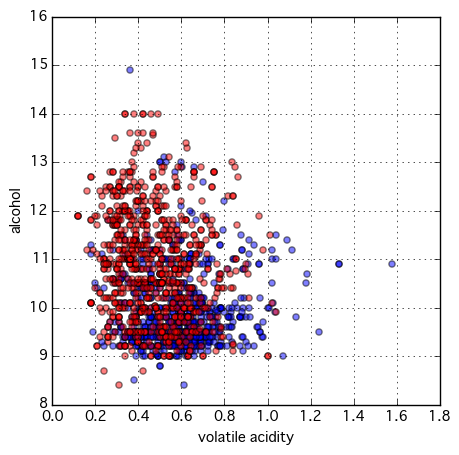

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
df1[df1['quality'] <= 5].plot(kind='scatter', x=u'volatile acidity', y=u'alcohol', ax=ax, 
                              c='blue', alpha=0.5)
df1[df1['quality'] >  5].plot(kind='scatter', x=u'volatile acidity', y=u'alcohol', ax=ax, 
                              c='red', alpha=0.5, grid=True, figsize=(5,5))
plt.show()

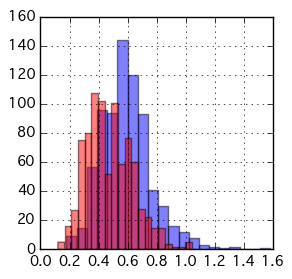

In [9]:
df1[df1['quality'] <= 5]['volatile acidity'].hist(figsize=(3, 3), bins=20, alpha=0.5, color='blue')
df1[df1['quality'] >  5]['volatile acidity'].hist(figsize=(3, 3), bins=20, alpha=0.5, color='red')

In [10]:
# 対応のないt検定
import numpy as np
import scipy as sp
from scipy import stats

significance = 0.05
X = df1[df1['quality'] <= 5]['volatile acidity'].tolist()
Y = df1[df1['quality'] >  5]['volatile acidity'].tolist()

t, p = stats.ttest_ind(X, Y)

print( "t 値は %(t)s" %locals() )
print( "確率は %(p)s" %locals() )

if p < significance:
    print("有意水準 %(significance)s で、有意な差があります" %locals())
else:
    print("有意水準 %(significance)s で、有意な差がありません" %locals())

t 値は 13.5655002264
確率は 9.33662078115e-40
有意水準 0.05 で、有意な差があります


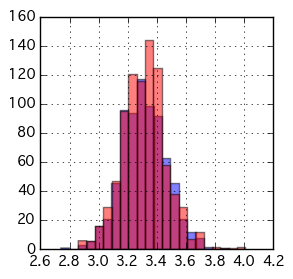

In [11]:
df1[df1['quality'] <= 5]['pH'].hist(figsize=(3, 3), bins=20, alpha=0.5, color='blue')
df1[df1['quality'] >  5]['pH'].hist(figsize=(3, 3), bins=20, alpha=0.5, color='red')

In [12]:
# 対応のないt検定
import numpy as np
import scipy as sp
from scipy import stats

significance = 0.05
X = df1[df1['quality'] <= 5]['pH'].tolist()
Y = df1[df1['quality'] >  5]['pH'].tolist()

t, p = stats.ttest_ind(X, Y)

print( "t 値は %(t)s" %locals() )
print( "確率は %(p)s" %locals() )

if p < significance:
    print("有意水準 %(significance)s で、有意な差があります" %locals())
else:
    print("有意水準 %(significance)s で、有意な差がありません" %locals())

t 値は 0.130437581408
確率は 0.896236662563
有意水準 0.05 で、有意な差がありません


In [13]:
df1['class'] = [0 if i <= 5 else 1 for i in df1['quality'].tolist()]

In [14]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5,0
5,7.4,0.660,0.00,1.8,0.075,13,40,0.99780,3.51,0.56,9.4,5,0
6,7.9,0.600,0.06,1.6,0.069,15,59,0.99640,3.30,0.46,9.4,5,0
7,7.3,0.650,0.00,1.2,0.065,15,21,0.99460,3.39,0.47,10.0,7,1
8,7.8,0.580,0.02,2.0,0.073,9,18,0.99680,3.36,0.57,9.5,7,1
9,7.5,0.500,0.36,6.1,0.071,17,102,0.99780,3.35,0.80,10.5,5,0


In [15]:
# それぞれに与える色を決める。
color_codes = {0:'#0000FF', 1:'#FF0000'}
colors = [color_codes[x] for x in df1['class'].tolist()]

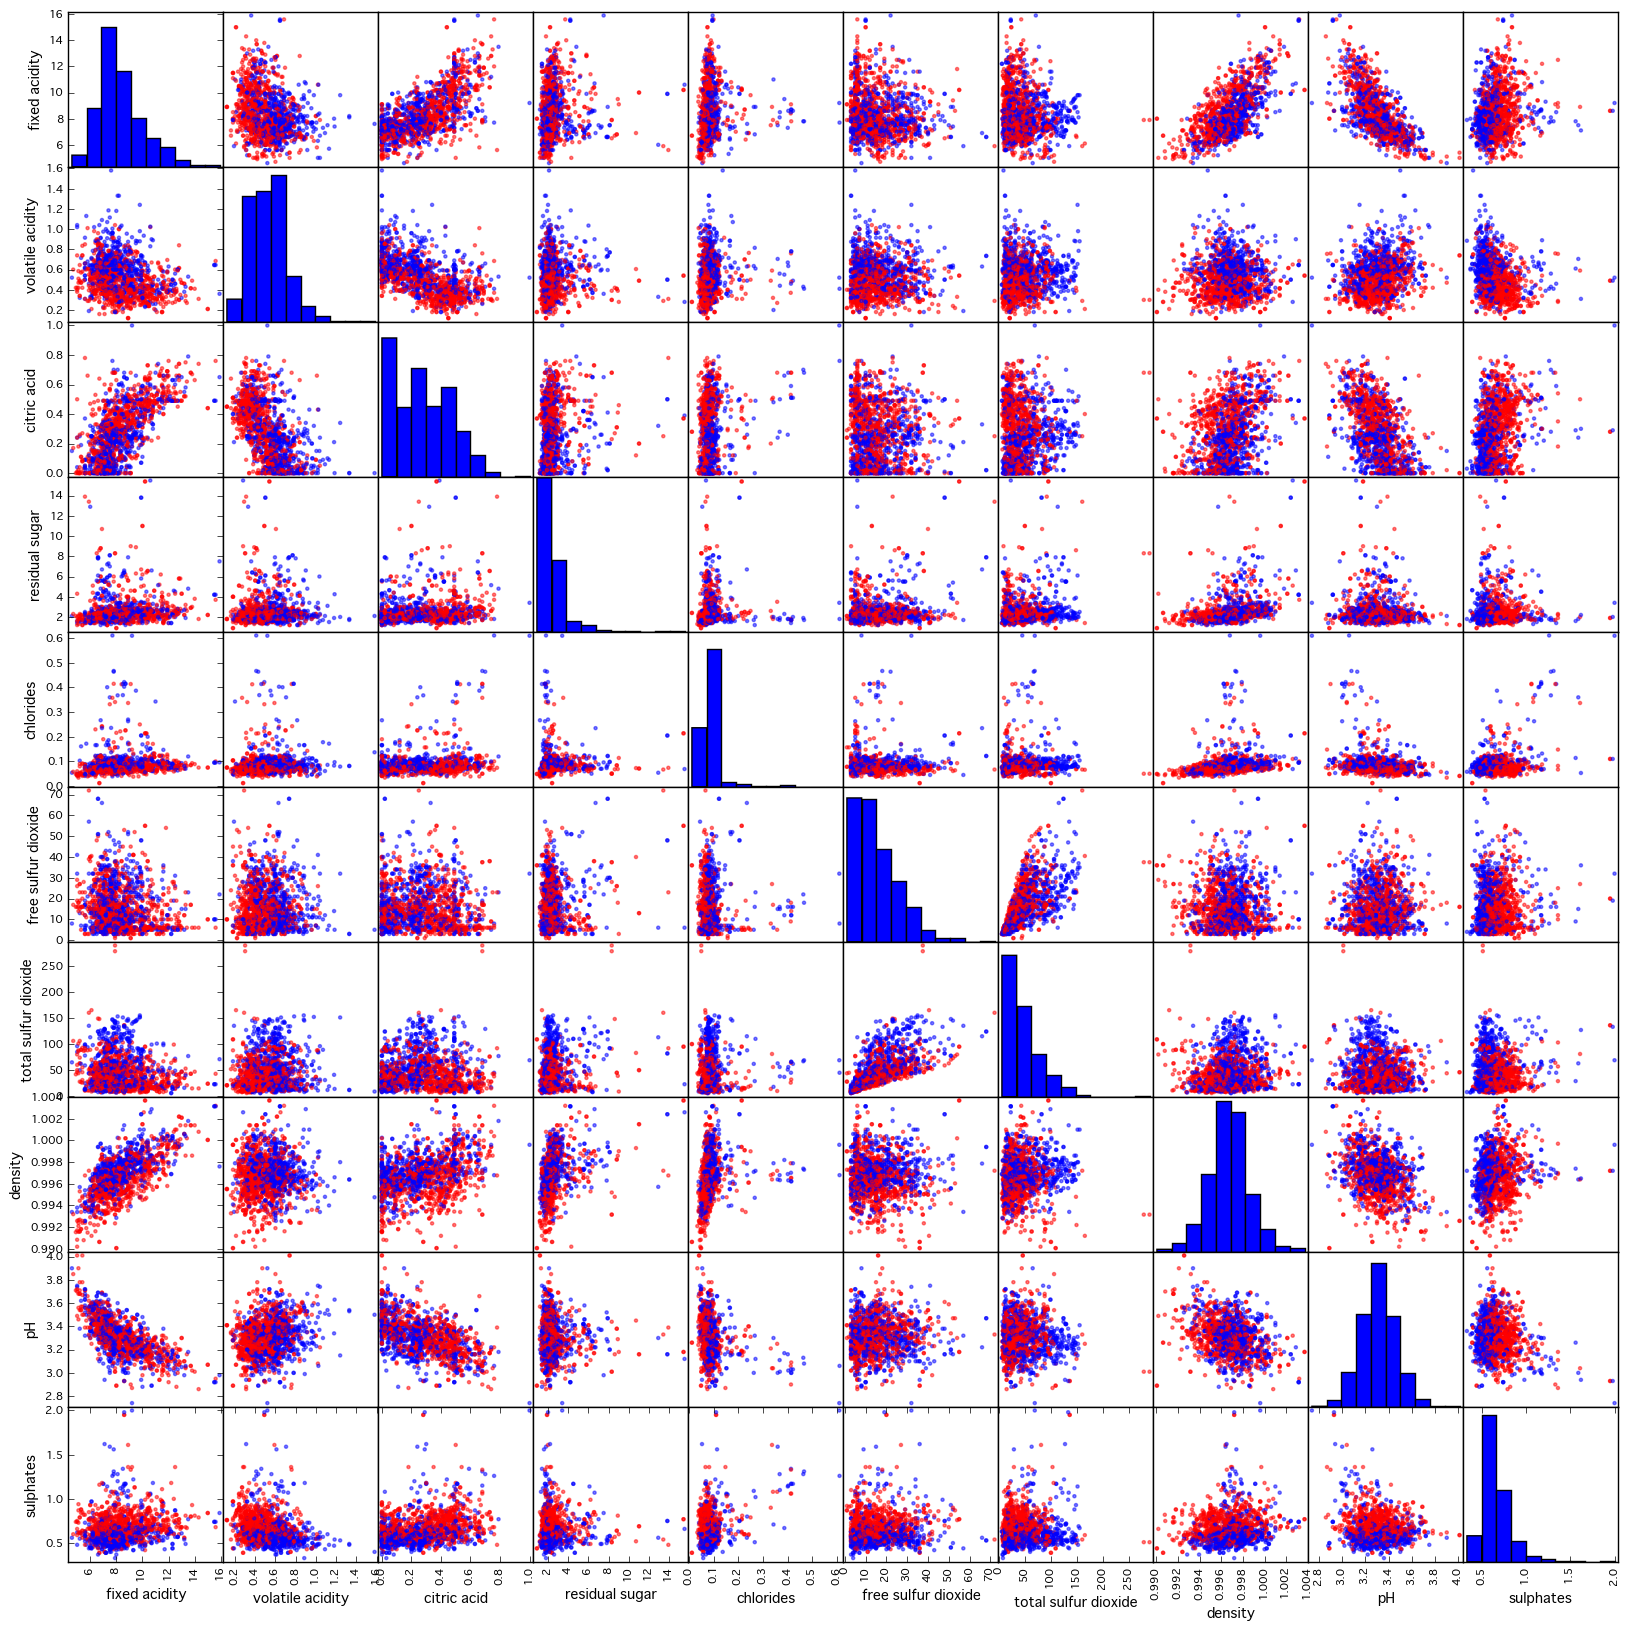

In [17]:
from pandas.tools import plotting # 高度なプロットを行うツールのインポート
plotting.scatter_matrix(df1.dropna(axis=1)[df1.columns[:10]], figsize=(20, 20), color=colors, alpha=0.5) 
plt.show()

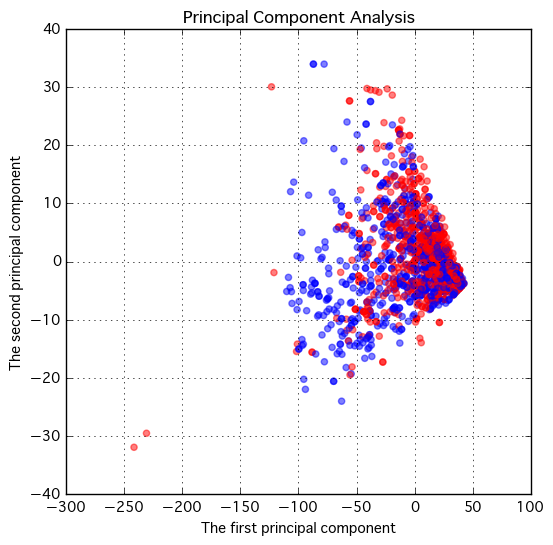

In [18]:
from sklearn.decomposition import PCA #主成分分析器
pca = PCA()
pca.fit(df1.iloc[:, :10])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(df1.iloc[:, :10])
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.5, color=colors)
plt.title("Principal Component Analysis")
plt.xlabel("The first principal component")
plt.ylabel("The second principal component")
plt.grid()
plt.show()

In [19]:
dfs = df1.apply(lambda x: (x-x.mean())/x.std(), axis=0).fillna(0)

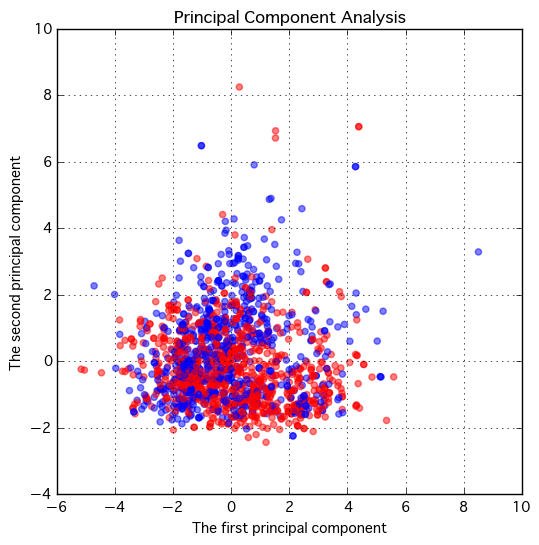

In [20]:
from sklearn.decomposition import PCA #主成分分析器
pca = PCA()
pca.fit(dfs.iloc[:, :10])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :10])
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.5, color=colors)
plt.title("Principal Component Analysis")
plt.xlabel("The first principal component")
plt.ylabel("The second principal component")
plt.grid()
plt.show()

<h3 STYLE="background: #c2edff;padding: 0.5em;"><a name="3">3. 説明変数と目的変数に分ける</a></h3>

In [23]:
X = dfs.iloc[:, :10]
y = df1.iloc[:, 12]

In [25]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025
5,-0.528194,0.738187,-1.391037,-0.524002,-0.264878,-0.274845,-0.196617,0.558100,1.288240,-0.579025
6,-0.241019,0.403103,-1.083031,-0.665853,-0.392360,-0.083643,0.380972,-0.183687,-0.071983,-1.168972
7,-0.585629,0.682339,-1.391037,-0.949556,-0.477348,-0.083643,-0.774207,-1.137414,0.510970,-1.109977
8,-0.298454,0.291408,-1.288368,-0.382151,-0.307372,-0.657248,-0.865405,0.028252,0.316652,-0.520031
9,-0.470759,-0.155370,0.457001,2.525799,-0.349866,0.107558,1.688149,0.558100,0.251880,0.836846


In [28]:
pd.DataFrame(y).T

,0,1,2,3,4,5,6,7,8,9,...,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598
class,0,0,0,1,0,0,0,1,1,0,...,0,1,1,1,1,0,1,1,0,1


<h3 STYLE="background: #c2edff;padding: 0.5em;"><a name="4">4. 訓練データとテストデータに分ける</a></h3>

In [107]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

In [108]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
391,3.090215,-0.630072,2.099702,0.256179,-0.052407,0.107558,-0.105419,2.465552,-1.626523,0.836846
1350,0.390767,0.403103,0.097661,-0.382151,-0.392360,1.541571,0.806565,-0.109509,0.187107,-0.520031
1076,0.907683,-1.160621,1.483689,-0.382151,-0.307372,-1.230854,-1.169400,-0.745326,-1.043571,0.423883
1095,0.620507,-0.713843,1.021680,-0.027523,-0.009913,-0.944051,-0.804607,0.515712,-1.043571,-0.932993
35,-0.298454,0.654416,-1.391037,2.100245,-0.031160,-1.039652,-0.865405,0.981978,0.575742,-0.638020
1086,0.103591,-1.048927,0.662339,1.532840,-0.689819,-1.230854,-1.139001,0.335564,0.446197,0.010921
1070,0.563072,-1.104774,0.919011,-0.736779,-0.647325,0.298760,-0.287816,-0.936071,-0.849253,1.367797
436,-0.183584,0.794034,0.148995,-0.382151,-0.583584,2.115176,0.472171,-0.501596,-0.331073,-0.579025
1108,-0.126149,1.408354,-0.877693,0.539882,0.053829,-1.135253,-1.017403,0.955486,0.316652,-0.991988
288,0.218462,-0.043675,-0.929027,-0.027523,0.075076,0.394361,0.076978,0.452130,0.187107,1.190813


In [109]:
pd.DataFrame(y_train).T

,391,1350,1076,1095,35,1086,1070,436,1108,288,...,720,1004,850,82,791,1215,1012,1045,1266,600
class,1,0,1,0,1,1,1,1,0,1,...,0,0,0,0,0,1,0,1,1,0


<h3 STYLE="background: #c2edff;padding: 0.5em;"><a name="5">5. ロジスティック回帰</a></h3>

In [110]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression() #モデルの生成
clf.fit(X_train, y_train) #学習

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [111]:
#学習したモデルの精度
clf.score(X_train,y_train)

0.72679874869655892

In [112]:
clf.score(X_test,y_test)

0.74062499999999998

In [113]:
y_predict = clf.predict(X_test)

In [114]:
y_predict

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [115]:
sum(y_predict)

318

In [116]:
sum(y_test)

338

In [117]:
from sklearn.metrics import confusion_matrix
# 予測と正解の比較。第一引数が行、第二引数が列を表す。
pd.DataFrame(confusion_matrix(y_predict, y_test), index=['predicted 0', 'predicted 1'], columns=['real 0', 'real 1'])

,real 0,real 1
predicted 0,229,93
predicted 1,73,245


<h3 STYLE="background: #c2edff;padding: 0.5em;"><a name="6">6. いろんな機械学習手法を比較する</a></h3>

In [118]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.lda import LDA
from sklearn.qda import QDA
names = ["Logistic Regression", "Nearest Neighbors", 
         "Linear SVM", "Polynomial SVM", "RBF SVM", "Sigmoid SVM", 
         "Decision Tree","Random Forest", "AdaBoost", "Naive Bayes", 
         "Linear Discriminant Analysis","Quadratic Discriminant Analysis"]

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    SVC(kernel="poly"),
    SVC(kernel="rbf"),
    SVC(kernel="sigmoid"),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    LDA(),
    QDA()]

In [119]:
result = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score1 = clf.score(X_train, y_train)
    score2 = clf.score(X_test, y_test)
    result.append([score1, score2])

df_result = pd.DataFrame(result, columns=['train', 'test'], index=names).sort('test', ascending=False)

In [120]:
df_result

,train,test
RBF SVM,0.784150,0.775000
Random Forest,0.988530,0.764062
AdaBoost,0.795620,0.759375
Linear SVM,0.726799,0.746875
Logistic Regression,0.726799,0.740625
Decision Tree,1.000000,0.737500
Linear Discriminant Analysis,0.726799,0.737500
Quadratic Discriminant Analysis,0.725756,0.735938
Naive Bayes,0.688217,0.706250
Polynomial SVM,0.750782,0.703125


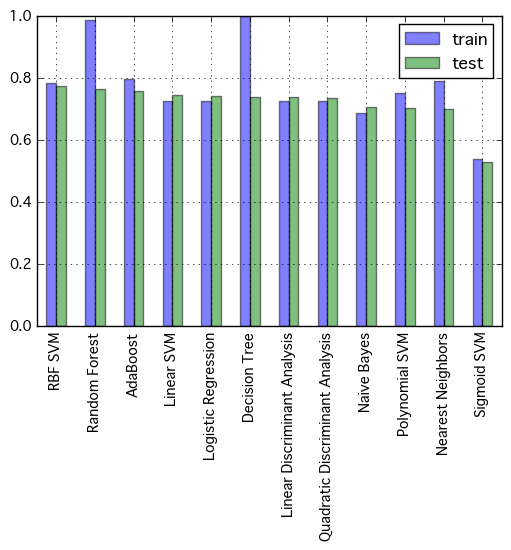

In [121]:
df_result.plot(kind='bar', alpha=0.5, grid=True)

In [139]:
result = []
for trial in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score1 = clf.score(X_train, y_train)
        score2 = clf.score(X_test, y_test)
        result.append([name, score1, score2])

df_result = pd.DataFrame(result, columns=['classifier', 'train', 'test'])

In [141]:
df_result

,classifier,train,test
0,Logistic Regression,0.724713,0.757812
1,Nearest Neighbors,0.777894,0.700000
2,Linear SVM,0.721585,0.751563
3,Polynomial SVM,0.764338,0.714063
4,RBF SVM,0.790407,0.740625
5,Sigmoid SVM,0.522419,0.553125
6,Decision Tree,1.000000,0.740625
7,Random Forest,0.991658,0.778125
8,AdaBoost,0.791449,0.740625
9,Naive Bayes,0.666319,0.710938


In [142]:
df_result_mean = df_result.groupby('classifier').mean().sort('test', ascending=False)

In [143]:
df_result_mean

,train,test
classifier,,
Random Forest,0.986653,0.765781
RBF SVM,0.798123,0.746094
Linear SVM,0.737852,0.729531
Logistic Regression,0.739520,0.728906
Linear Discriminant Analysis,0.737643,0.728750
AdaBoost,0.799062,0.724062
Decision Tree,1.000000,0.717969
Quadratic Discriminant Analysis,0.717518,0.702188
Nearest Neighbors,0.796455,0.701875


In [194]:
errors = df_result.groupby('classifier').std()
errors

,train,test
classifier,,
AdaBoost,0.010451,0.017496
Decision Tree,0.000000,0.015455
Linear Discriminant Analysis,0.008782,0.017511
Linear SVM,0.009846,0.017868
Logistic Regression,0.008981,0.015010
Naive Bayes,0.009688,0.022729
Nearest Neighbors,0.010226,0.016335
Polynomial SVM,0.009660,0.015454
Quadratic Discriminant Analysis,0.014494,0.022729


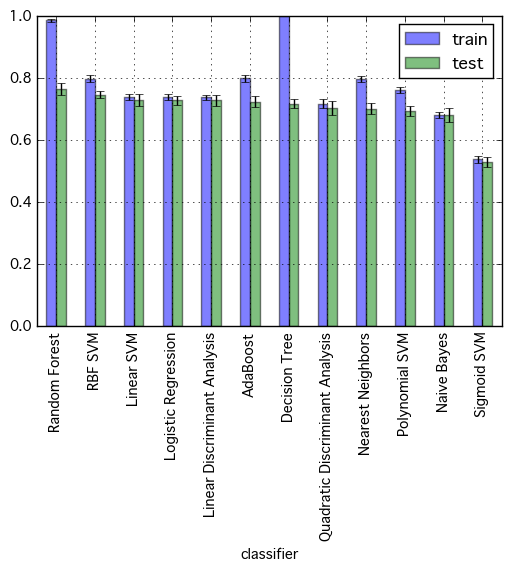

In [195]:
df_result_mean.plot(kind='bar', alpha=0.5, grid=True, yerr=errors)